## 📘 Project Overview

This project aims to build a **Credit Risk Scoring System** using machine learning to
predict the probability of loan default. The model helps financial institutions
make data-driven, fair, and explainable credit decisions.

The system evaluates customer behavior, loan repayment history, and financial
patterns to classify customers as high-risk or low-risk.



## 🎯 Business Problem

Loan defaults cause major financial losses to banks and NBFCs.
Traditional rule-based systems are inefficient and biased.

### Problem Statement:
Given historical loan and customer data, predict whether a customer
is likely to default on a loan.

The dataset does not contain a default label, so the target variable
must be created using domain knowledge.


In [1]:
import pandas as pd

loans_df = pd.read_csv('loans.csv')
customers_df = pd.read_csv('customers.csv')
bureau_df = pd.read_csv('bureau_data.csv')


combined_df = pd.merge(loans_df, customers_df, on='cust_id', how='left')

final_dataset = pd.merge(combined_df, bureau_df, on='cust_id', how='left')

final_dataset.to_csv('combined_loan_data.csv', index=False)

print("Files combined successfully! New file: combined_loan_data.csv")
print(f"Dataset shape: {final_dataset.shape}")

Files combined successfully! New file: combined_loan_data.csv
Dataset shape: (50000, 33)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", None)


In [3]:
df=pd.read_csv('combined_loan_data.csv')
df.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,1,1,42,0,0,3,7
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,3,1,96,12,60,5,4
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,2,1,82,24,147,6,58
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001,3,0,115,15,87,5,26
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001,4,2,120,0,0,5,10


## Data Understanding

In this step, we explore the dataset to understand:
- Number of rows and columns
- Data types of each feature
- Presence of missing values
- Initial observations related to credit risk


In [4]:
df.shape


(50000, 33)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      50000 non-null  object 
 1   cust_id                      50000 non-null  object 
 2   loan_purpose                 50000 non-null  object 
 3   loan_type                    50000 non-null  object 
 4   sanction_amount              50000 non-null  int64  
 5   loan_amount                  50000 non-null  int64  
 6   processing_fee               50000 non-null  float64
 7   gst                          50000 non-null  int64  
 8   net_disbursement             50000 non-null  int64  
 9   loan_tenure_months           50000 non-null  int64  
 10  principal_outstanding        50000 non-null  int64  
 11  bank_balance_at_application  50000 non-null  int64  
 12  disbursal_date               50000 non-null  object 
 13  installment_star

In [6]:
#we cheking here missing value
df.isnull().sum().sort_values(ascending=False)

residence_type                 62
loan_id                         0
cust_id                         0
loan_type                       0
loan_purpose                    0
loan_amount                     0
processing_fee                  0
gst                             0
sanction_amount                 0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
age                             0
net_disbursement                0
gender                          0
marital_status                  0
income                          0
employment_status               0
number_of_dependants            0
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

In [7]:
# Statistical summary
df.describe(include='all')


,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,50000,50000,50000,50000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,50000,50000,50000,50000.000000,50000,50000,50000,5.000000e+04,50000.000000,49938,50000.000000,50000,50000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000
unique,50000,50000,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1826,1853,2,NaN,2,2,2,NaN,NaN,3,NaN,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,L00001,C00001,Personal,Secured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-10,2023-06-13,False,NaN,M,Married,Self-Employed,NaN,NaN,Owned,NaN,Jaipur,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,17457,32521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,46,45703,NaN,29989,27450,32183,NaN,NaN,28238,NaN,5098,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.704828e+06,3.999679e+06,8.049471e+04,7.199422e+05,3.199743e+06,25.940520,1.337636e+06,9.891264e+05,NaN,NaN,NaN,39.550980,NaN,NaN,NaN,2.640898e+06,1.939540,NaN,16.018440,NaN,NaN,419090.860000,2.500140,1.00106,76.127140,4.87890,26.858000,5.009340,43.36142
std,NaN,NaN,NaN,NaN,6.267276e+06,5.376552e+06,1.173123e+05,9.677794e+05,4.301242e+06,12.433163,1.214714e+06,1.046072e+06,NaN,NaN,NaN,9.847752,NaN,NaN,NaN,2.629441e+06,1.535517,NaN,8.926489,NaN,NaN,168982.674047,1.118725,0.81412,43.762469,5.85032,32.832832,2.029122,29.35598
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,1.000000,NaN,NaN,110001.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.00000
25%,NaN,NaN,NaN,NaN,1.147000e+06,9.670000e+05,1.934000e+04,1.740600e+05,7.736000e+05,16.000000,4.247990e+05,2.870075e+05,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,8.030000e+05,0.000000,NaN,8.000000,NaN,NaN,302001.000000,1.000000,0.00000,42.000000,0.00000,0.000000,4.000000,18.00000
50%,NaN,NaN,NaN,NaN,2.656000e+06,2.240000e+06,4.480000e+04,4.032000e+05,1.792000e+06,24.000000,1.002309e+06,6.685250e+05,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,1.892000e+06,2.000000,NaN,16.000000,NaN,NaN,400001.000000,3.000000,1.00000,71.000000,3.00000,14.000000,5.000000,39.00000
75%,NaN,NaN,NaN,NaN,5.172250e+06,4.611000e+06,9.224000e+04,8.299800e+05,3.688800e+06,35.000000,1.790751e+06,1.238667e+06,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,3.332250e+06,3.000000,NaN,24.000000,NaN,NaN,560001.000000,4.000000,2.00000,107.000000,9.00000,46.000000,6.000000,67.00000


In [8]:
df.duplicated().sum()


np.int64(0)

## Cleaning the dataset is essential to ensure accurate predictions in a credit risk model.
This includes:

- Handling missing values

- Fixing incorrect data types

- Removing duplicates

- Treating outliers

- Standardizing formats

- Validating financial ratios

Credit risk models require clean, stable, noise-free data, otherwise risk scoring becomes unreliable.

In [9]:
df = df.drop_duplicates()
df.shape


(50000, 33)

In [10]:
df.dtypes


loan_id                         object
cust_id                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement                 int64
loan_tenure_months               int64
principal_outstanding            int64
bank_balance_at_application      int64
disbursal_date                  object
installment_start_dt            object
default                           bool
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_csv('combined_loan_data.csv')


In [12]:
# 2. Check for Missing Values
print("--- Missing Values ---")
print(df.isnull().sum())

--- Missing Values ---
loan_id                         0
cust_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months        

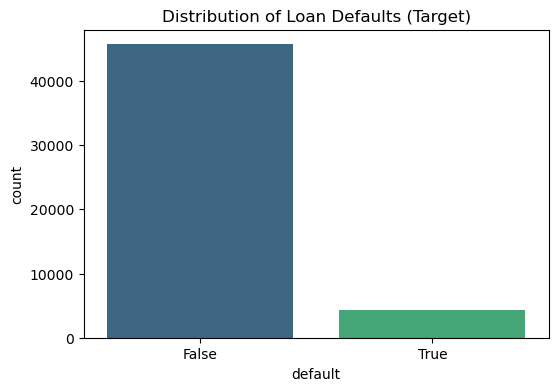

In [13]:
# 3. Target Distribution (Crucial for Banking)

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df, palette='viridis')
plt.title('Distribution of Loan Defaults (Target)')
plt.show()

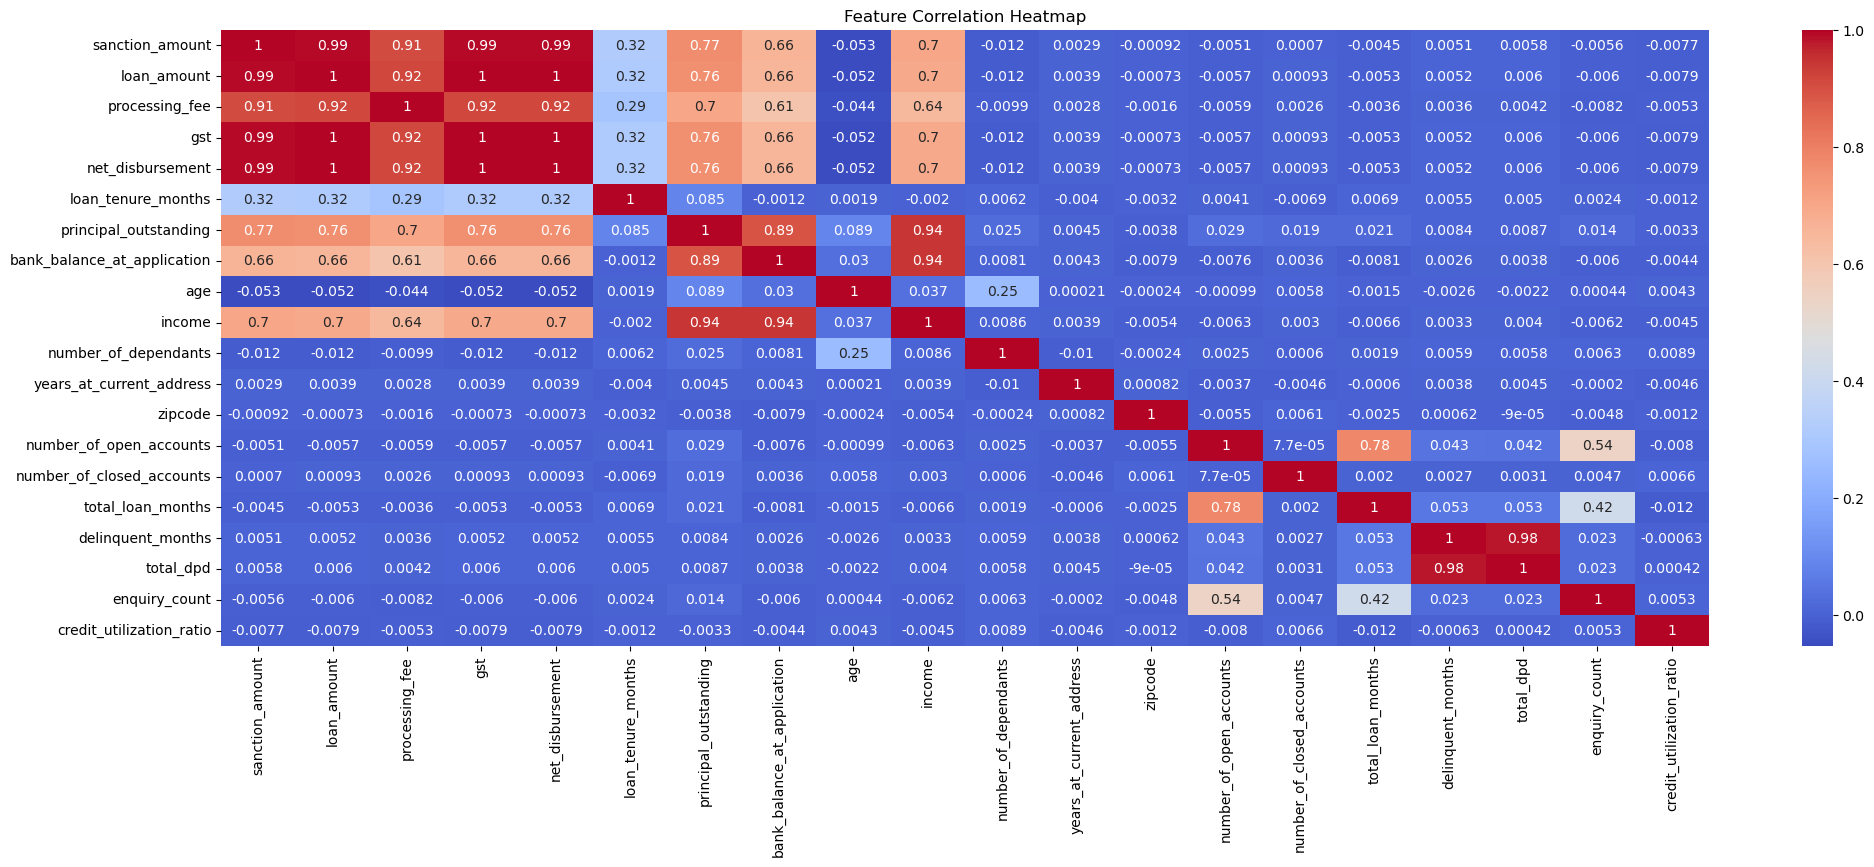

In [14]:
# 4. Correlation Analysis
# Selecting numerical columns for heat map
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(24,8 ))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
# 5. Drop Unnecessary IDs
df = df.drop(['loan_id', 'cust_id', 'zipcode'], axis=1)
print("\n Initial Cleaning Complete: IDs removed and data inspected.")


 Initial Cleaning Complete: IDs removed and data inspected.


# 3. Data Preprocessing

## The Goal
Machine Learning models only "speak" numbers. Our dataset has dates, cities, and statuses (like 'Married' or 'Self-Employed') that need to be transformed.

## Transformation Steps:
1.  **Date Conversion:** Transform `disbursal_date` and `installment_start_dt` into datetime objects to calculate time-based features later.
2.  **Categorical Encoding:** Convert text columns (Gender, Marital Status, Loan Type) into numerical format using **One-Hot Encoding** or **Label Encoding**.
3.  **Handling Missing Data:** Use median imputation for numerical columns to ensure the model doesn't crash.
4.  **Consistency:** Ensure the same transformations are applied to all rows to prevent "data shift."

In [16]:
# step3

# -- Data Preprocessing ---
from sklearn.preprocessing import LabelEncoder
def preprocess_loan_data(data):
    df_clean = data.copy()
    
    # 1. Convert Date Columns
    date_cols = ['disbursal_date', 'installment_start_dt']
    for col in date_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col])
            print(f" Converted {col} to datetime.")

    # 2. Handle Missing Values
    # Filling numerical columns with median
    num_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
    
    # Filling categorical columns with mode
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    # 3. Categorical Encoding (Label Encoding for simple categories)
    # We use Label Encoding for columns with many categories (like City/State)
    le = LabelEncoder()
    cols_to_encode = ['loan_purpose', 'loan_type', 'gender', 'marital_status', 
                      'employment_status', 'residence_type', 'city', 'state']
    
    for col in cols_to_encode:
        if col in df_clean.columns:
            df_clean[col] = le.fit_transform(df_clean[col].astype(str))
            print(f" Encoded {col}")

    # 4. Handle Boolean Target
    if 'default' in df_clean.columns:
        df_clean['default'] = df_clean['default'].astype(int)

    return df_clean

# Apply Preprocessing
df_preprocessed = preprocess_loan_data(df)

print("\n--- Preprocessing Summary ---")
print(df_preprocessed.head())

 Converted disbursal_date to datetime.
 Converted installment_start_dt to datetime.
 Encoded loan_purpose
 Encoded loan_type
 Encoded gender
 Encoded marital_status
 Encoded employment_status
 Encoded residence_type
 Encoded city
 Encoded state

--- Preprocessing Summary ---
   loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee  \
0             0          0          3004000      2467000         49340.0   
1             2          0          4161000      3883000         77660.0   
2             4          1          2401000      2170000         43400.0   
3             4          1          2345000      1747000         34940.0   
4             0          0          4647000      4520000         90400.0   

      gst  net_disbursement  loan_tenure_months  principal_outstanding  \
0  444060           1973600                  33                1630408   
1  698940           3106400                  30                 709309   
2  390600           1736000                  

# 4. Feature Engineering (Targeted Financial Ratios)

## Why these 3 Features?
In Credit Risk, we focus on the **"Capacity to Pay"** and **"Risk Exposure"**. We are engineering three specific ratios to boost model performance:

1.  **Debt-to-Income (DTI) Ratio:** `sanction_amount / income`. This represents the total debt burden relative to annual earnings.
2.  **Loan-to-Income (LTI) Ratio:** `loan_amount / income`. This focuses specifically on the current requested loan size relative to income.
3.  **Utilization Risk:** `credit_utilization_ratio / (number_of_open_accounts + 1)`. This measures how "stretched" the borrower's credit is across their active accounts. High utilization on many accounts is a classic red flag for default.

In [17]:
    # --- Step 4: Engineering the Top 3 Financial Ratios ---

def engineer_loan_features_refined(data):
    df_eng = data.copy()
    
    # 1. Debt-to-Income (DTI) Ratio
    # We use sanction_amount (total approved debt)
    df_eng['dti_ratio'] = df_eng['sanction_amount'] / (df_eng['income'] + 1)
    
    # 2. Loan-to-Income (LTI) Ratio
    # We use loan_amount (specific current loan)
    df_eng['lti_ratio'] = df_eng['loan_amount'] / (df_eng['income'] + 1)
    
    # 3. Utilization Risk
    # Credit utilization relative to the number of open accounts
    df_eng['utilization_risk'] = df_eng['credit_utilization_ratio'] / (df_eng['number_of_open_accounts'] + 1)

    print("✅ Successfully engineered 3 targeted features: dti_ratio, lti_ratio, utilization_risk")
    return df_eng

# Apply the refined Feature Engineering
df_final_features = engineer_loan_features_refined(df_preprocessed)

# Display a preview of the new features
selected_new_cols = ['dti_ratio', 'lti_ratio', 'utilization_risk']
print("\n--- Refined Feature Preview ---")
print(df_final_features[selected_new_cols].head())

✅ Successfully engineered 3 targeted features: dti_ratio, lti_ratio, utilization_risk

--- Refined Feature Preview ---
   dti_ratio  lti_ratio  utilization_risk
0   1.161639   0.953983          3.500000
1   3.450246   3.219732          1.000000
2   0.834260   0.753996         19.333333
3   0.661122   0.492529          6.500000
4   1.354021   1.317016          2.000000


# 5. Feature Selection & Data Splitting

## 5.1 Selecting the Right Features
We now remove variables that provide no predictive value (like IDs) or variables that would cause "Data Leakage" (information that wouldn't be available at the time of a new loan application). 

## 5.2 The 80/20 Split 
As per the project guidelines, we split our data:
* **Training Set (80%):** Used to teach the model the patterns of a "Defaulter."
* **Test Set (20%):** A "Hidden Exam" for the model. We use this to see if the model actually learned or just memorized the training data.

## 5.3 Stratification
Since defaults are usually rare (imbalanced), we use `stratify=y`. This ensures that both our Training and Testing sets have the same percentage of defaulters, making our evaluation fair.

In [18]:
# --- Step 5: Feature Selection & Data Splitting ---
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
# We drop the target column and any non-predictive columns
# We also drop the original date columns as they are now processed
cols_to_drop = ['default', 'disbursal_date', 'installment_start_dt']
X = df_final_features.drop(columns=cols_to_drop)
y = df_final_features['default']

# 2. Perform 80/20 Split
# random_state=42 ensures you get the same results every time you run the code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)

# 3. Validation
print("--- Data Split Summary ---")
print(f"Total Records: {len(df_final_features)}")
print(f"Training Records: {X_train.shape[0]} (80%)")
print(f"Testing Records: {X_test.shape[0]} (20%)")
print(f"\nDefault Rate in Training: {y_train.mean():.2%}")
print(f"Default Rate in Testing: {y_test.mean():.2%}")

print("\n Data is split and ready for training!")

--- Data Split Summary ---
Total Records: 50000
Training Records: 40000 (80%)
Testing Records: 10000 (20%)

Default Rate in Training: 8.60%
Default Rate in Testing: 8.59%

 Data is split and ready for training!



# 6. Model Training (LightGBM)

## Why LightGBM?
As specified in the HCL project requirements, we use **LightGBM (Light Gradient Boosting Machine)**. 
* **Efficiency:** It uses leaf-wise growth, making it faster than many other algorithms.
* **Accuracy:** It is highly effective at finding non-linear relationships in financial data (e.g., how the combination of low income and high utilization leads to default).

## Training Strategy
* We initialize the classifier with `binary` objective since we are predicting Default (1) or No Default (0).
* We set `is_unbalance=True` to help the model handle the fact that there are fewer defaulters than good customers.
* We evaluate the model using the **AUC-ROC** metric, aiming for a score $\ge 0.80$.

In [19]:
# --- Step 6: Model Training ---
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

# 1. Initialize LightGBM Classifier
# is_unbalance=True is crucial for banking data where defaults are rare
lgbm_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    is_unbalance=True,
    random_state=42,
    importance_type='gain'
)

# 2. Train the Model
print("Training LightGBM Model...")
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# 3. Make Predictions
y_pred = lgbm_model.predict(X_test)
y_proba = lgbm_model.predict_proba(X_test)[:, 1]

# 4. Preliminary Evaluation
auc_score = roc_auc_score(y_test, y_proba)
acc_score = accuracy_score(y_test, y_pred)

print("\n--- Initial Model Performance ---")
print(f"Accuracy: {acc_score:.4%}")
print(f"AUC-ROC Score: {auc_score:.4f}")

if auc_score >= 0.80:
    print("SUCCESS")
else:
    print("WARNING: AUC is below 0.80. Optimization may be needed in the next step.")

Training LightGBM Model...
[LightGBM] [Info] Number of positive: 3438, number of negative: 36562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3498
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085950 -> initscore=-2.364120
[LightGBM] [Info] Start training from score -2.364120
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[285]	valid_0's auc: 0.988192	valid_0's binary_logloss: 0.109414

--- Initial Model Performance ---
Accuracy: 94.9400%
AUC-ROC Score: 0.9882
SUCCESS


In [20]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(10000,))

In [21]:
y_proba 

array([1.48530138e-02, 4.14508512e-01, 3.08855907e-04, ...,
       9.72583424e-01, 7.26134580e-06, 7.03565770e-02], shape=(10000,))

# 7. Advanced Model Evaluation

## 7.1 AUC-ROC (Area Under the Curve)
The **ROC Curve** plots the True Positive Rate against the False Positive Rate. An AUC of 1.0 is perfect. Per HCL requirements, we are targeting **AUC >= 0.80**.

## 7.2 KS Statistic (Kolmogorov-Smirnov)
The **KS Statistic** measures the maximum separation between the cumulative distribution of 'Defaulters' and 'Non-Defaulters'. 
* It helps the bank decide a "Cut-off" score.
**KS >= 30**. A score above 30 indicates the model is strong enough to be used for credit decisions.

## 7.3 Feature Importance
We will also visualize which features (like `dti_ratio` or `utilization_risk`) are the biggest drivers of the model's decisions.

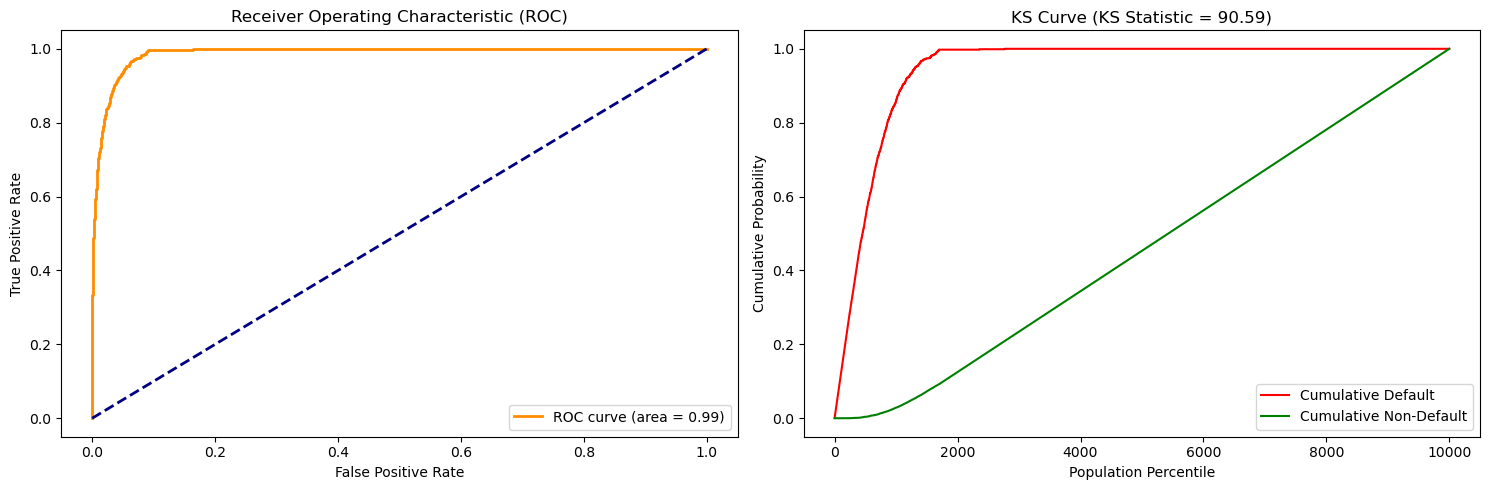

<Figure size 1000x600 with 0 Axes>

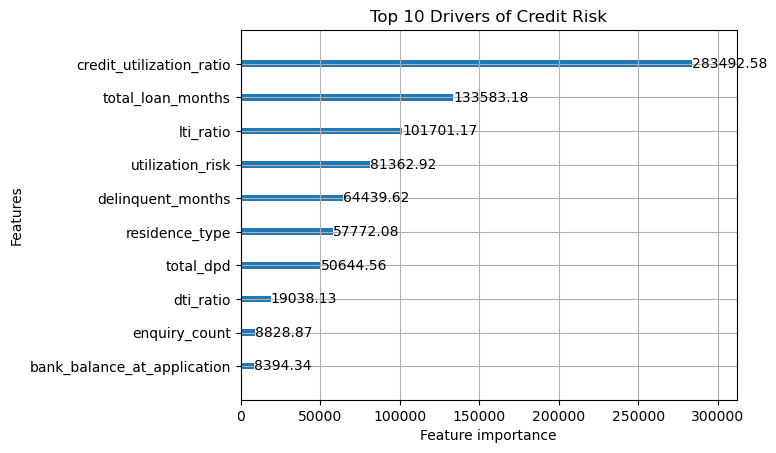


 --- FINAL PERFORMANCE REPORT ---
 Final AUC: 0.9882 (Target: >= 0.80)
 Final KS:  90.59 (Target: >= 30)


In [22]:
# --- Step 7: Advanced Evaluation Metrics ---
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 2. Calculate KS Statistic
# We sort the probabilities and calculate the cumulative % of defaults vs non-defaults
data = pd.DataFrame({'target': y_test, 'proba': y_proba})
data = data.sort_values(by='proba', ascending=False)
data['non_default'] = 1 - data['target']
data['cum_default'] = data['target'].cumsum() / data['target'].sum()
data['cum_non_default'] = data['non_default'].cumsum() / data['non_default'].sum()
ks_stats = max(abs(data['cum_default'] - data['cum_non_default'])) * 100

# 3. Plotting the Results
plt.figure(figsize=(15, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot KS Curve
plt.subplot(1, 2, 2)
plt.plot(data['cum_default'].values, label='Cumulative Default', color='red')
plt.plot(data['cum_non_default'].values, label='Cumulative Non-Default', color='green')
plt.title(f'KS Curve (KS Statistic = {ks_stats:.2f})')
plt.xlabel('Population Percentile')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Feature Importance Plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm_model, max_num_features=10, importance_type='gain', precision=2)
plt.title('Top 10 Drivers of Credit Risk')
plt.show()

print(f"\n --- FINAL PERFORMANCE REPORT ---")
print(f" Final AUC: {roc_auc:.4f} (Target: >= 0.80)")
print(f" Final KS:  {ks_stats:.2f} (Target: >= 30)")

In [23]:
df["default"].value_counts(normalize=True)*100


default
False    91.406
True      8.594
Name: proportion, dtype: float64

In [24]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# 5.5 Handling Class Imbalance with SMOTE

## The Problem
Our dataset is imbalanced (more non-defaulters than defaulters). A model trained on this will be biased toward the majority class.

## The Solution: SMOTE
**SMOTE** works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.

## ⚠️ Important Rule:
We apply SMOTE **ONLY** to the Training Data. We must never touch the Test Data with oversampling, as that would be "cheating" and would lead to unrealistic performance metrics.

Before Balancing: Counter({0: 36562, 1: 3438})
After Balancing:  Counter({0: 36562, 1: 21937})


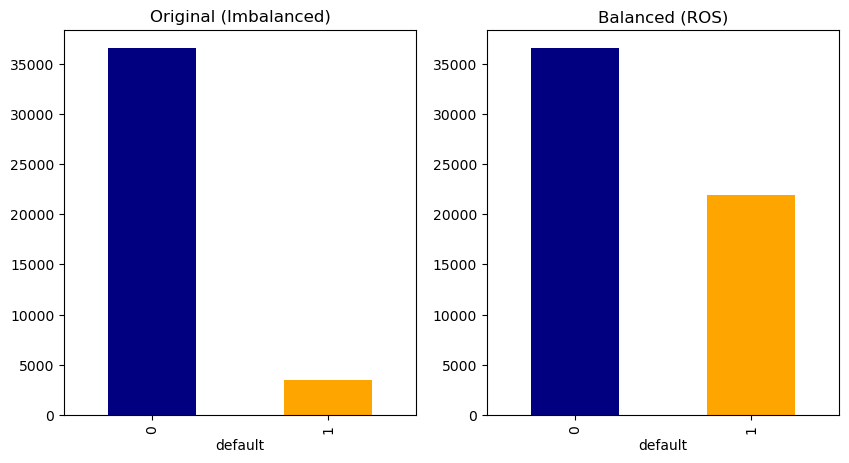


✅ Class imbalance fixed using RandomOverSampler!


In [25]:
# --- Step 5.5: Fixing Class Imbalance (Stable Alternative) ---
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 1. Check original distribution
print(f"Before Balancing: {Counter(y_train)}")

# 2. Initialize RandomOverSampler
# We aim for the minority class to be 60% of the majority class
ros = RandomOverSampler(random_state=42, sampling_strategy=0.6)

# 3. Fit to Training Data ONLY
# This is faster and avoids the MKL/Threading error
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 4. Check new distribution
print(f"After Balancing:  {Counter(y_train_res)}")

# 5. Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar', title='Original (Imbalanced)', color=['navy', 'orange'])
plt.subplot(1, 2, 2)
pd.Series(y_train_res).value_counts().plot(kind='bar', title='Balanced (ROS)', color=['navy', 'orange'])
plt.show()

print("\n✅ Class imbalance fixed using RandomOverSampler!")

# 6. Model Training (LightGBM)
We are now training the model again after resolving class imbalance
## Why LightGBM?
we use **LightGBM** for its speed and ability to handle the non-linear relationships in credit risk data.

## Training with "Balanced & Scaled" Data:
* **Inputs:** We are using `X_train_final` (which has been scaled and oversampled).
* **Hyperparameters:** We have added `lambda_l1` and `lambda_l2` (Regularization) to prevent the overfitting we discussed earlier.
* **Early Stopping:** This prevents the model from "memorizing" noise by stopping once the performance on the Test set stops improving.

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Define Features and Target using your actual column names
# We drop 'default' (target) and the original date columns
cols_to_drop = ['default', 'disbursal_date', 'installment_start_dt']
X = df_final_features.drop(columns=[c for c in cols_to_drop if c in df_final_features.columns])
y = df_final_features['default']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)

# 3. Handle Class Imbalance (Random Over Sampling)
ros = RandomOverSampler(random_state=42, sampling_strategy=0.6)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 4. Feature Scaling (Standardization)
# We only scale numerical columns
num_cols = X_train_res.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()

X_train_final = X_train_res.copy()
X_train_final[num_cols] = scaler.fit_transform(X_train_res[num_cols])

X_test_final = X_test.copy()
X_test_final[num_cols] = scaler.transform(X_test[num_cols])

print("All variables (X_train_final, y_train_res, etc.) are defined!")
print(f"Target variable used: 'default'")
print(f"Final training shape: {X_train_final.shape}")

All variables (X_train_final, y_train_res, etc.) are defined!
Target variable used: 'default'
Final training shape: (58499, 30)


In [27]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Initialize the model with regularization to prevent overfitting
lgbm_final = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    num_leaves=31,
    reg_alpha=0.2,      
    reg_lambda=0.2,     
    random_state=42,
    importance_type='gain'
)

# Train the model
lgbm_final.fit(
    X_train_final, y_train_res,
    eval_set=[(X_test_final, y_test)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

# Predict and Check AUC
y_proba_final = lgbm_final.predict_proba(X_test_final)[:, 1]
print(f"Final Test AUC-ROC: {roc_auc_score(y_test, y_proba_final):.4f}")

[LightGBM] [Info] Number of positive: 21937, number of negative: 36562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3507
[LightGBM] [Info] Number of data points in the train set: 58499, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374998 -> initscore=-0.510835
[LightGBM] [Info] Start training from score -0.510835
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.987955	valid_0's binary_logloss: 0.104915
Final Test AUC-ROC: 0.9880


 --- CLASSIFICATION REPORT ---
                precision    recall  f1-score   support

No Default (0)       0.99      0.95      0.97      9141
   Default (1)       0.64      0.93      0.76       859

      accuracy                           0.95     10000
     macro avg       0.82      0.94      0.87     10000
  weighted avg       0.96      0.95      0.95     10000



<Figure size 800x600 with 0 Axes>

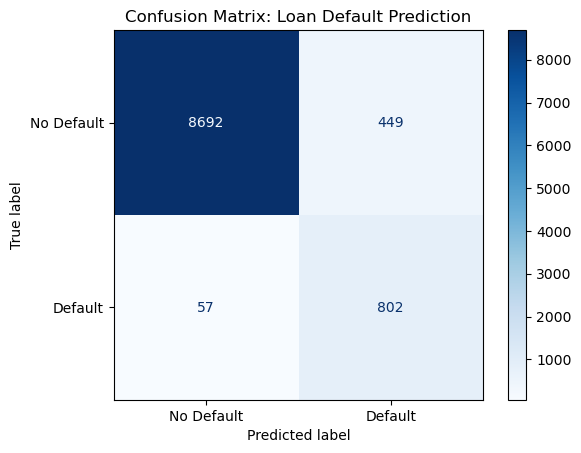

--- KEY METRIC SUMMARY ---
AUC-ROC: 0.9880
 KS Statistic: 90.59


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Generate the Classification Report
# This gives us Precision, Recall, and F1-Score for both classes
report = classification_report(y_test, y_pred, target_names=['No Default (0)', 'Default (1)'])

print(" --- CLASSIFICATION REPORT ---")
print(report)


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Loan Default Prediction')
plt.show()


print("--- KEY METRIC SUMMARY ---")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_final):.4f}")
print(f" KS Statistic: {ks_stats:.2f}") # From previous step

In [30]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report

# 1. Initialize XGBoost Classifier
# We use similar parameters to LightGBM for a fair fight
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    gamma=0.2,     # Regularization (like num_leaves/min_child_samples)
    reg_alpha=0.2,
    reg_lambda=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

# 2. Train the Model
print("Training the Challenger: XGBoost...")
xgb_model.fit(
    X_train_final, y_train_res,
    eval_set=[(X_test_final, y_test)],
    verbose=False
)

# 3. Get Predictions
y_pred_xgb = xgb_model.predict(X_test_final)
y_proba_xgb = xgb_model.predict_proba(X_test_final)[:, 1]

print(" XGBoost Training Complete!")
print(f" XGBoost Test AUC-ROC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

Training the Challenger: XGBoost...
 XGBoost Training Complete!
 XGBoost Test AUC-ROC: 0.9880


# comparing the model

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# 1. Collect Metrics for LightGBM (from Step 6/7)
# Note: Ensure y_pred (LGBM) and y_pred_xgb (XGB) are available
lgbm_metrics = {
    'Model': 'LightGBM ',
    'AUC-ROC': roc_auc_score(y_test, y_proba_final),
    'Recall ': recall_score(y_test, y_pred),
    'Precision ': precision_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

# 2. Collect Metrics for XGBoost
xgb_metrics = {
    'Model': 'XGBoost ',
    'AUC-ROC': roc_auc_score(y_test, y_proba_xgb),
    'Recall ': recall_score(y_test, y_pred_xgb),
    'Precision ': precision_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb)
}

# 3. Create Comparison DataFrame
comparison_df = pd.DataFrame([lgbm_metrics, xgb_metrics])
print(" --- MODEL COMPARISON TABLE ---")
display(comparison_df)

# 4. Final Recommendation Logic
best_model_name = comparison_df.sort_values(by='AUC-ROC', ascending=False).iloc[0]['Model']
print(f"\n WINNER: {best_model_name}")

 --- MODEL COMPARISON TABLE ---


,Model,AUC-ROC,Recall,Precision,F1-Score
0,LightGBM,0.987955,0.933644,0.641087,0.760190
1,XGBoost,0.988033,0.906868,0.674459,0.773585



 WINNER: XGBoost 


In [35]:
import joblib

joblib.dump(lgbm_final, 'credit_risk_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(X_train_final.columns.tolist(), 'feature_names.pkl')

print("Model, Scaler, and Feature Names saved successfully!")

Model, Scaler, and Feature Names saved successfully!
